**1. IRIS DATASET**


IRIS Dataset:
Accuracy Score: 1.0


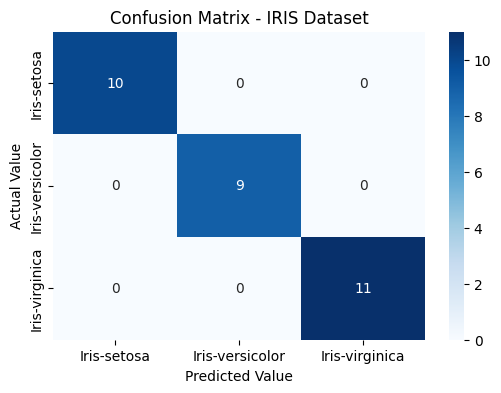

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the IRIS dataset
iris = pd.read_csv("iris (1).csv")
X_iris = iris.iloc[:, :-1]  # Features
y_iris = iris.iloc[:, -1]   # Target

# Split into train (80%) and test (20%)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train DecisionTree classifier
clf_iris = DecisionTreeClassifier()
clf_iris.fit(X_train_iris, y_train_iris)

# Predict and evaluate
y_pred_iris = clf_iris.predict(X_test_iris)
print("IRIS Dataset:")
print("Accuracy Score:", accuracy_score(y_test_iris, y_pred_iris))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test_iris, y_pred_iris)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf_iris.classes_, yticklabels=clf_iris.classes_)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix - IRIS Dataset")
plt.show()

**2. DRUG DATASET**

Drug Dataset:
Accuracy Score: 1.0


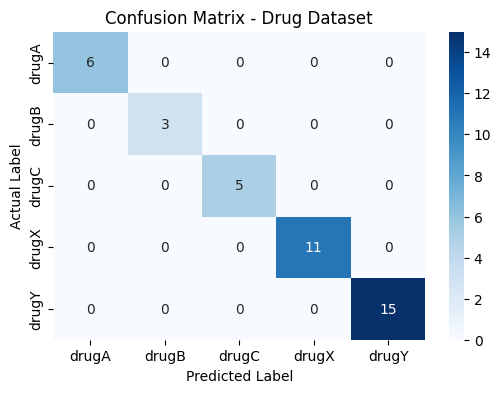

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the Drug dataset
drug = pd.read_csv("drug.csv")
X_drug = drug.iloc[:, :-1]  # Features
y_drug = drug.iloc[:, -1]   # Target

# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol']:
    label_encoders[col] = LabelEncoder()
    X_drug[col] = label_encoders[col].fit_transform(X_drug[col])

# Split into train (80%) and test (20%)
X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

# Train DecisionTree classifier
clf_drug = DecisionTreeClassifier()
clf_drug.fit(X_train_drug, y_train_drug)

# Predict and evaluate
y_pred_drug = clf_drug.predict(X_test_drug)
print("Drug Dataset:")
print("Accuracy Score:", accuracy_score(y_test_drug, y_pred_drug))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test_drug, y_pred_drug)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf_drug.classes_, yticklabels=clf_drug.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Drug Dataset")
plt.show()


**3. PETROL CONSUMPTION DATASET**

Petrol Consumption Prediction:
Mean Absolute Error: 96.2
Mean Squared Error: 17858.2
Root Mean Squared Error: 133.63457636405332


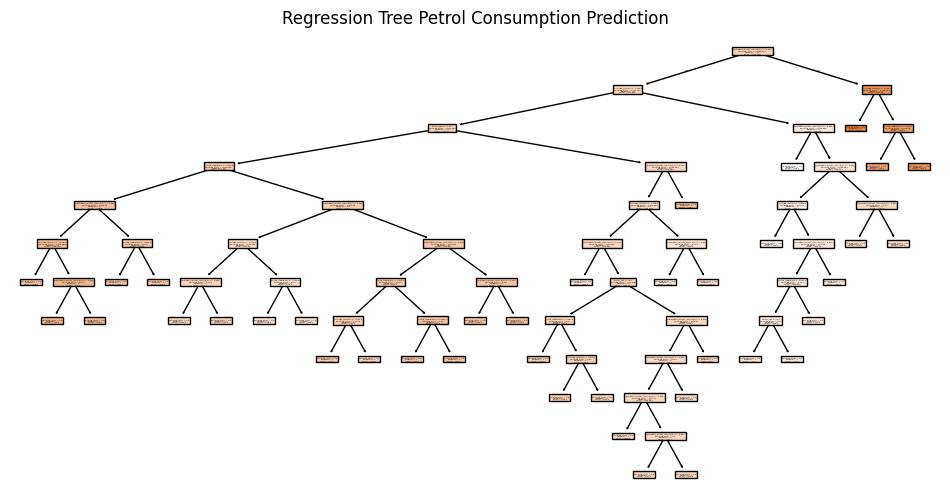

Feature Importances: [('Population_Driver_licence(%)', np.float64(0.6657971008323302)), ('Average_income', np.float64(0.23251264184383524)), ('Petrol_tax', np.float64(0.057828019412832596)), ('Paved_Highways', np.float64(0.04386223791100191))]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the Petrol Consumption dataset
petrol = pd.read_csv("petrol_consumption.csv")
X_petrol = petrol.iloc[:, :-1]  # Features
y_petrol = petrol.iloc[:, -1]   # Target

# Split into train (80%) and test (20%)
X_train_petrol, X_test_petrol, y_train_petrol, y_test_petrol = train_test_split(X_petrol, y_petrol, test_size=0.2, random_state=42)

# Train RegressionTree model
regressor = DecisionTreeRegressor()
regressor.fit(X_train_petrol, y_train_petrol)

# Predict on test data
y_pred_petrol = regressor.predict(X_test_petrol)

# Evaluate the model
mae = mean_absolute_error(y_test_petrol, y_pred_petrol)
mse = mean_squared_error(y_test_petrol, y_pred_petrol)
rmse = np.sqrt(mse)

print("Petrol Consumption Prediction:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Visualizing the Regression Tree
plt.figure(figsize=(12, 6))
plot_tree(regressor, feature_names=X_petrol.columns, filled=True)
plt.title("Regression Tree Petrol Consumption Prediction")
plt.show()

# Display feature importance
feature_importance = regressor.feature_importances_
feature_names = X_petrol.columns
sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
print("Feature Importances:", sorted_features)


Petrol Consumption Regression:
Mean Absolute Error (MAE): 86.4444
Mean Squared Error (MSE): 15649.4426
Root Mean Squared Error (RMSE): 125.0977


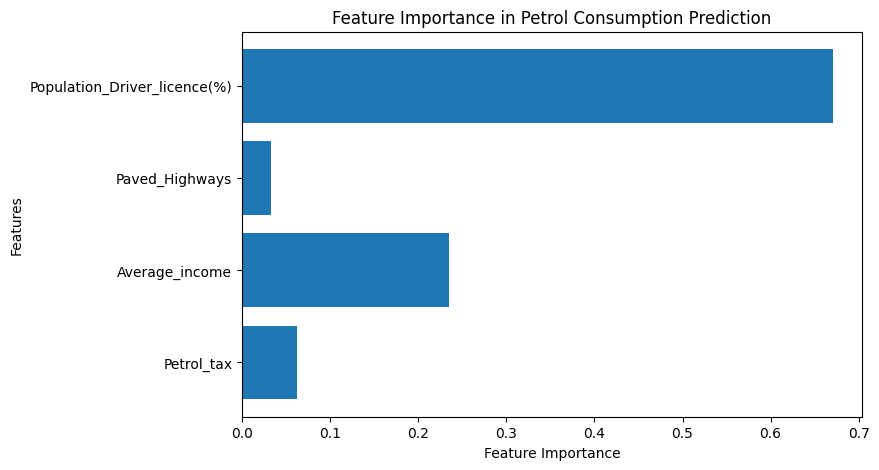

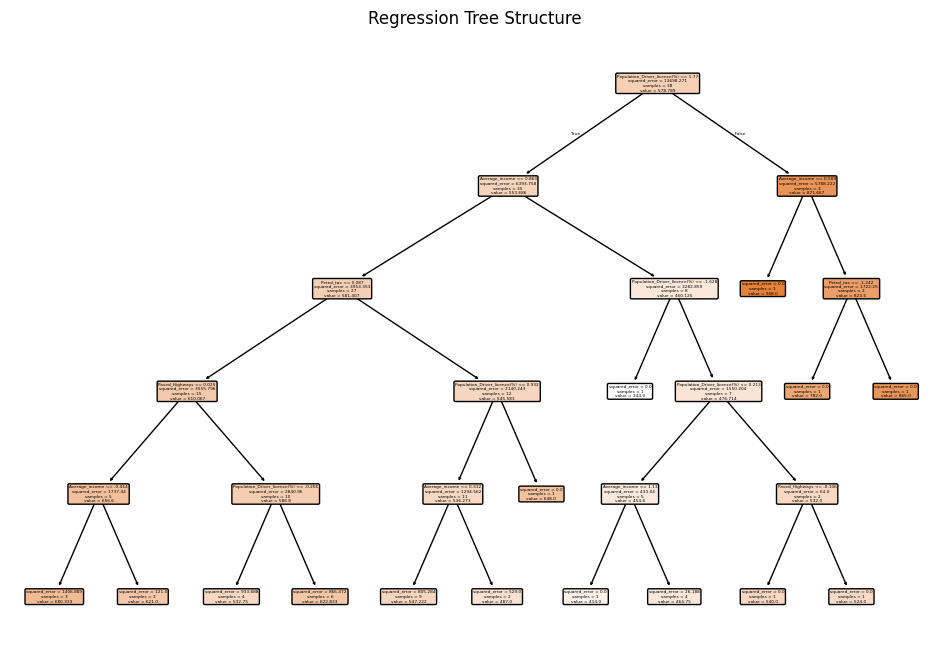

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

petrol_df = pd.read_csv("petrol_consumption.csv")

X = petrol_df.drop(columns=["Petrol_Consumption"])
y = petrol_df["Petrol_Consumption"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Petrol Consumption Regression:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

plt.figure(figsize=(8, 5))
plt.barh(petrol_df.columns[:-1], model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Petrol Consumption Prediction")
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=petrol_df.columns[:-1], filled=True, rounded=True)
plt.title("Regression Tree Structure")
plt.show()